# Lab. IA - Imunológico

In [1]:
import numpy as np
import math
import random
import matplotlib as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import matplotlib.pyplot as plt_graph
plt_graph.rcParams['font.size'] = 12

In [2]:
Offset_funcao = 2000

In [3]:
# Retirando o offset de +200 somado á função objetivo (devido a negatividade do resultado)
def removeOffset(resultados):
    for idx, elemento in enumerate(resultados):
        resultados[idx] = - (elemento + Offset_funcao)
    return resultados

In [4]:
def initPopulacao(x_dominio, y_dominio, populacao_tam):
    populacao = []
    for i in range(populacao_tam):
        x = random.randrange(x_dominio[0],x_dominio[1])
        y = random.randrange(y_dominio[0],y_dominio[1])
        populacao.append([x,y])
    return populacao

In [5]:
def indivAleatorio(x_dominio, y_dominio):
    x = random.randrange(x_dominio[0],x_dominio[1])
    y = random.randrange(y_dominio[0],y_dominio[1])
    return x,y

In [6]:
def objetivo(individuo):
    x = individuo[0]; y = individuo[1];
    f1 = np.sin(x) * np.power(np.e, np.power(1 - np.cos(y), 2))
    f2 = np.cos(y) * np.power(np.e, np.power(1 - np.sin(x), 2))
    f3 = np.power((x-y), 2)
    funcao = - (f1 + f2 + f3 + Offset_funcao)
    return funcao

In [7]:
def objetivoOriginal(individuo):
    x = individuo[0]; y = individuo[1];
    f1 = np.sin(x) * np.power(np.e, np.power(1 - np.cos(y), 2))
    f2 = np.cos(y) * np.power(np.e, np.power(1 - np.sin(x), 2))
    f3 = np.power((x-y), 2)
    funcao = (f1 + f2 + f3)
    return funcao

In [8]:
def clonagem(individuo):
    clones = []
    for i in range(int(ro * tamanho_populacao)):
        if type(individuo) is tuple:
            individuo = list(individuo)
        clones.append(individuo.copy())
    return clones

In [9]:
def mutacao(clones, ro, d_max, d):
    alpha = 1 / np.exp( ro * (d/d_max))
    for indiv in clones:
        random_mutacao_x = random.randrange(0, 100) / 100
        random_mutacao_y = random.randrange(0, 100) / 100
        #print(random_mutacao_x, random_mutacao_y)
        if random_mutacao_x <= alpha:
            novo_x = random.randrange(-100, 100) / 100
            #print(novo_x)
            indiv[0] += indiv[0] * novo_x 
        if random_mutacao_y <= alpha:
            novo_y = random.randrange(-100, 100) / 100
            indiv[1] += indiv[1] * novo_y
            #print(novo_y)
    return clones    

In [10]:
def melhorIndiv(clones):
    melhor = clones[0]
    fx_melhor = objetivo(melhor)
    for indiv in clones[1:]:
        fx = objetivo(indiv)
        if fx > fx_melhor:
            melhor = indiv
            fx_melhor = fx
    return melhor

In [11]:
def comparar(item):
   return item[1], item[0]

In [12]:
# Iniciando população e definindo os dominios para os valores de (X, Y) e o tamanho da população
dominio_x0 = -10; dominio_x1 = 10; 
dominio_y0 = -10; dominio_y1 = 10; 
tamanho_populacao = 50;  

populacao = initPopulacao([dominio_x0, dominio_x1], [dominio_y0, dominio_y1], tamanho_populacao)
print("Populacao inicial: " + str(populacao))

Populacao inicial: [[-5, -3], [9, 8], [-3, -8], [-10, 8], [4, 9], [3, 2], [-7, 8], [-5, 2], [-4, 0], [7, -9], [2, -3], [9, 9], [-4, -7], [-5, 9], [5, -1], [-5, -3], [-7, -10], [3, 4], [-7, -5], [4, 9], [3, -1], [5, 0], [-2, 7], [-3, -6], [-7, 4], [3, 5], [-5, -9], [-4, -8], [-4, -5], [8, 4], [1, -8], [-4, 8], [6, -3], [4, 2], [-4, -2], [-3, 8], [-1, -4], [5, -2], [8, 7], [5, 0], [-9, 0], [9, -7], [-4, -4], [5, -9], [-7, 3], [6, -10], [0, -1], [1, 8], [-8, -4], [9, -6]]


In [13]:
# Definindo o numero maximo de gerações, a quantidade de individuos a ser substituido em uma nova população e o Ro
geracao_atual = 1; max_geracoes = 50; aptidao_por_geracao = []
num_indiv_substituir = np.ceil(0.1 * len(populacao)); ro = 0.1
condicao_parada = 0; populacao_geral = []

for i in range(max_geracoes):
    print("Geração atual: " + str(geracao_atual) + " ==================================================================== ")
    
    # Na primeira geração atribuimos o melhor valor e o melhor individuo como o primeiro individuo da população 
    # Puramente para iniciar as variaveis de "melhor_aptidao" e "melhor_indiv"
    if geracao_atual == 1:
        melhor_aptidao = objetivo(populacao[0]); melhor_indiv = populacao[0];
        print("   Melhor valor: " + str(-(melhor_aptidao + Offset_funcao)))
        print("   Melhor individuo: " + str(melhor_indiv))

    # Calculando a aptidao de cada individuo da população atual
    # Neste caso a aptidão é puramente o valor do individuo aplicado á função objetivo
    aptidao = [];
    melhor_aptidao_geracao = objetivo(populacao[0])
    for indiv in populacao:
        aptidao_atual = objetivo(indiv)
        aptidao.append(aptidao_atual)
        if aptidao_atual > melhor_aptidao:
            melhor_aptidao = aptidao_atual
            melhor_indiv = indiv
            print("   Melhor valor: " + str(-(melhor_aptidao + Offset_funcao)))
            print("   Melhor individuo: " + str(melhor_indiv)) 
            condicao_parada = 0
        if aptidao_atual > melhor_aptidao_geracao:
            melhor_aptidao_geracao = aptidao_atual
    
    # Salvando o melhor valor por geração
    aptidao_por_geracao.append(melhor_aptidao_geracao)
    
    # Condição de parada antes de 100 gerações -> Não encontrou um valor melhor que o melhor valor nas ultimas 20 gerações
    if aptidao_por_geracao[geracao_atual - 1] < melhor_aptidao:
        condicao_parada += 1
        
    if condicao_parada == 20:
        print("   Condição de parada atingida - Encerrando algoritmo :3")
        break

    # Realizando: Clonagem -> Mutação -> Seleção do melhor individuo dos clones mutados
    # Apos isso o individuo selecionado é salvo em uma nova população
    nova_populacao = []
    for idx, indiv in enumerate(populacao):
        indivduo_clonado = clonagem(indiv)
        clones_mutados = mutacao(indivduo_clonado, ro, melhor_aptidao, aptidao[idx])
        melhor_individuo = melhorIndiv(clones_mutados)
        nova_populacao.append(melhor_individuo)
        
    # Calculando a aptidao de cada individuo da nova população
    # Neste caso a aptidão é puramente o valor do individuo aplicado á função objetivo
    nova_aptidao = []
    for idx, indiv in enumerate(nova_populacao):
        nova_aptidao_indiv = objetivo(indiv)
        nova_aptidao.append([idx, nova_aptidao_indiv])
    nova_aptidao = sorted(nova_aptidao, key = comparar)

    # Substituindo os "num_indiv_substituir" individuos por novos valores aleatorios
    for i in range(int(num_indiv_substituir)):
        idx = nova_aptidao[i][0]
        nova_populacao[idx] = indivAleatorio([dominio_x0, dominio_x1], [dominio_y0, dominio_y1])

    # Atribuindo a populacao atual a nova população e partindo para a proxima geração
    populacao = nova_populacao
    geracao_atual += 1  

Geração atual: 1 ==================================================================== 
   Melhor valor: 53.314467173179764
   Melhor individuo: [-5, -3]
   Melhor valor: 2.3251323708568634
   Melhor individuo: [9, 8]
   Melhor valor: -24.1393671508863
   Melhor individuo: [4, 9]
   Melhor valor: -33.44306691395877
   Melhor individuo: [-8, -4]
Geração atual: 2 ==================================================================== 
   Melhor valor: -34.615878708196306
   Melhor individuo: [-2.01, -4.0]
   Melhor valor: -48.528481059525575
   Melhor individuo: [4.109999999999999, 3.7]
   Melhor valor: -77.50390851968086
   Melhor individuo: [-1.1400000000000001, -3.36]
Geração atual: 3 ==================================================================== 
   Melhor valor: -86.83949444125756
   Melhor individuo: [-1.7848, -2.777599999999999]
Geração atual: 4 ==================================================================== 
   Melhor valor: -102.57019686372382
   Melhor individuo: [-1.615

In [14]:
# Removendo offset do melhor individuo de cada geração
aptidao_por_geracao = removeOffset(aptidao_por_geracao)

In [15]:
print("\nMelhor resultado geral: " + str(min(aptidao_por_geracao)))
print("Melhor X e Y: " + str(melhor_indiv))
print("* O melhor resultado foi obtido na geração: " + str(aptidao_por_geracao.index(min(aptidao_por_geracao)) + 1))


Melhor resultado geral: -106.47587812732172
Melhor X e Y: [-1.5851692191882414, -3.084434645683314]
* O melhor resultado foi obtido na geração: 43


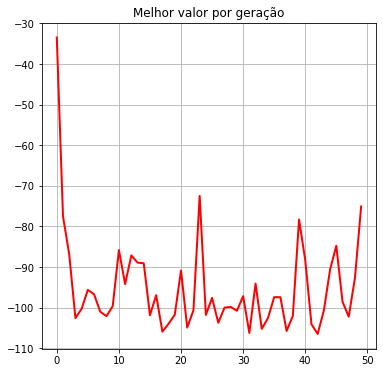

In [16]:
# Grafico com a melhor aptidao (melhor valor da função objetivo) por geração
coord_x = range(0, len(aptidao_por_geracao))
coord_y = aptidao_por_geracao

plt_graph.figure(figsize=(6, 6))
plt_graph.title("Melhor valor por geração")
plt_graph.plot(coord_x, coord_y, markersize = 6, color = "red", linewidth = 2)
plt_graph.grid(True)
plt_graph.show()

In [17]:
X = np.linspace(-10, 10, 100)
Y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(X, Y)
Z = objetivo([X, Y])
Z = removeOffset(Z)

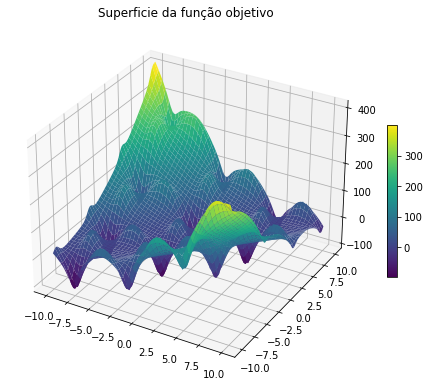

In [18]:
fig = plt_graph.figure(figsize =(8, 8))
ax = plt_graph.axes(projection ='3d')
my_cmap = plt_graph.get_cmap('viridis')

surf = ax.plot_surface(X, Y, Z, cmap = my_cmap)
fig.colorbar(surf, ax = ax, shrink = 0.35, aspect = 15)
ax.set_title('Superficie da função objetivo')
plt_graph.show()